In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Laoding the CSV Files
products_df = pd.read_csv(r'updatepath\PRODUCTS_TAKEHOME.csv') #update the path as per local source
transactions_df = pd.read_csv(r'updatepath\TRANSACTION_TAKEHOME.csv') #update the path as per local source
users_df = pd.read_csv(r'updatepath\USER_TAKEHOME.csv') #update the path as per local source

In [3]:
# To call Dataframes
#products_df
#transactions_df
#users_df

## Exercise 1: Exploratory Data Analysis 

### Exploratory Data Analysis 

In [7]:
#Function to analyze the three DataFrames by data types, checking missing values, and the percentage of missing values
def analyze_dataframe(df, name): 
    total_rows = len(df)
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / total_rows) * 100 #calcualting % of missing data by fields
    
    # Create a DataFrame to store the summary statistics
    df_info = pd.DataFrame({
        "Data Type": df.dtypes,
        "Missing Values": missing_values,
        "Non-Null Count": df.count(),
        "% Missing": missing_percentage.round(2)
    })

    print(f"\n{name} Information:")
    display(df_info)  # Display in table

analyze_dataframe(products_df, "Products")
analyze_dataframe(transactions_df, "Transaction")
analyze_dataframe(users_df, "User")



Products Information:


,Data Type,Missing Values,Non-Null Count,% Missing
CATEGORY_1,object,111,845441,0.01
CATEGORY_2,object,1424,844128,0.17
CATEGORY_3,object,60566,784986,7.16
CATEGORY_4,object,778093,67459,92.02
MANUFACTURER,object,226474,619078,26.78
BRAND,object,226472,619080,26.78
BARCODE,float64,4025,841527,0.48



Transaction Information:


,Data Type,Missing Values,Non-Null Count,% Missing
RECEIPT_ID,object,0,50000,0.00
PURCHASE_DATE,object,0,50000,0.00
SCAN_DATE,object,0,50000,0.00
STORE_NAME,object,0,50000,0.00
USER_ID,object,0,50000,0.00
BARCODE,float64,5762,44238,11.52
FINAL_QUANTITY,object,0,50000,0.00
FINAL_SALE,object,0,50000,0.00



User Information:


,Data Type,Missing Values,Non-Null Count,% Missing
ID,object,0,100000,0.00
CREATED_DATE,object,0,100000,0.00
BIRTH_DATE,object,3675,96325,3.68
STATE,object,4812,95188,4.81
LANGUAGE,object,30508,69492,30.51
GENDER,object,5892,94108,5.89


In [8]:
# Function to analyze duplicate rows in the three DataFrames
def analyze_duplicates(df, name):
    duplicates_count = df.duplicated().sum()  # Count duplicate rows

    # Create a DataFrame to store the duplicate count
    duplicates_info = pd.DataFrame({
        "Metric": ["Duplicate Rows"],
        "Count": [duplicates_count]
    })

    print(f"\n{name} Duplicate:")
    display(duplicates_info)  # Display in table

# Call the function for each DataFrame
analyze_duplicates(products_df, "Products")
analyze_duplicates(transactions_df, "Transactions")
analyze_duplicates(users_df, "Users")



Products Duplicate:


,Metric,Count
0,Duplicate Rows,215



Transactions Duplicate:


,Metric,Count
0,Duplicate Rows,171



Users Duplicate:


,Metric,Count
0,Duplicate Rows,0


In [9]:
#Summary statistics for numerical columns
products_stats = products_df.describe()
transactions_stats = transactions_df.describe()
users_stats = users_df.describe()
display(products_stats, transactions_stats, users_stats)

,BARCODE
count,8.415270e+05
mean,6.016109e+11
std,1.022530e+12
min,1.850000e+02
25%,7.124923e+10
50%,6.344185e+11
75%,7.683955e+11
max,6.291108e+13


,BARCODE
count,4.423800e+04
mean,1.715863e+11
std,3.269219e+11
min,-1.000000e+00
25%,3.077212e+10
50%,5.210004e+10
75%,8.536765e+10
max,9.347108e+12


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,100000,100000,96325,95188,69492,94108
unique,100000,99942,54721,52,2,11
top,5ef3b4f17053ab141787697d,2023-01-12 18:30:15.000 Z,1970-01-01 00:00:00.000 Z,TX,en,female
freq,1,2,1272,9028,63403,64240


### Data Quality Reviews

In [14]:
#Convert BARCODE to string to preserve formatting and check for anomalies
products_df['BARCODE'] = products_df['BARCODE'].astype(str)
transactions_df['BARCODE'] = transactions_df['BARCODE'].astype(str)

In [15]:
# Check for outliers in numerical fields
products_outliers = products_df.describe()
products_outliers

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
count,845441,844128,784986,67459,619078,619080,845552
unique,27,121,344,127,4354,8122,841343
top,Health & Wellness,Candy,Confection Candy,Lip Balms,PLACEHOLDER MANUFACTURER,REM BRAND,nan
freq,512695,121036,56965,9737,86902,20813,4025


In [17]:
transactions_outliers = transactions_df.describe()
transactions_outliers

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
count,50000,50000,50000,50000,50000,50000,50000,50000
unique,24440,89,24440,954,17694,11028,87,1435
top,bedac253-2256-461b-96af-267748e6cecf,2024-06-15,2024-09-08 20:00:42.348 Z,WALMART,64e62de5ca929250373e6cf5,nan,1.00,
freq,12,774,12,21326,22,5762,35698,12500


In [19]:
users_outliers = users_df.describe()
users_outliers

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,100000,100000,96325,95188,69492,94108
unique,100000,99942,54721,52,2,11
top,5ef3b4f17053ab141787697d,2023-01-12 18:30:15.000 Z,1970-01-01 00:00:00.000 Z,TX,en,female
freq,1,2,1272,9028,63403,64240


In [20]:
# Check for anomalies in FINAL_QUANTITY and FINAL_SALE
transactions_df[['FINAL_QUANTITY', 'FINAL_SALE']].map(lambda x: str(x).isnumeric()).sum()

FINAL_QUANTITY    0
FINAL_SALE        0
dtype: int64

In [22]:
# Check unique values in GENDER to identify inconsistencies
unique_genders = users_df['GENDER'].dropna().unique()
unique_genders

array(['female', 'male', 'non_binary', 'transgender', 'prefer_not_to_say',
       'not_listed', 'Non-Binary', 'unknown', 'not_specified',
       "My gender isn't listed", 'Prefer not to say'], dtype=object)

In [23]:
# Check for invalid birthdates (e.g., default dates)
invalid_birth_dates = users_df['BIRTH_DATE'].value_counts().head(10)
invalid_birth_dates

BIRTH_DATE
1970-01-01 00:00:00.000 Z    1272
1979-12-11 08:00:00.000 Z      63
2000-12-12 00:00:00.000 Z      28
2000-12-31 00:00:00.000 Z      23
2001-01-01 00:00:00.000 Z      16
1999-12-31 00:00:00.000 Z      15
1988-10-28 04:00:00.000 Z      15
1999-12-12 00:00:00.000 Z      14
2000-12-11 00:00:00.000 Z      14
1990-01-01 00:00:00.000 Z      14
Name: count, dtype: int64

In [24]:
# Check for invalid birthdates (e.g., default dates)
Final_Sale_Check = transactions_df['FINAL_SALE'].value_counts().head(10)
Final_Sale_Check

FINAL_SALE
        12500
1.25     1323
1.00      744
2.99      588
1.99      586
3.99      567
2.00      537
3.98      508
4.99      484
0.00      480
Name: count, dtype: int64

### Data Cleaning

In [30]:
# 1. Drop CATEGORY_4 from products dataset due to high missing rate
products_df.drop(columns=['CATEGORY_4'], inplace=True)

# 2. Convert BARCODE to string across datasets to avoid numerical truncation issues
products_df['BARCODE'] = products_df['BARCODE'].astype(str)
transactions_df['BARCODE'] = transactions_df['BARCODE'].astype(str)

# 3. Standardize GENDER values to lowercase and unify similar values
gender_mapping = {
    'Non-Binary': 'non_binary',
    'non_binary': 'non_binary',
    'transgender': 'transgender',
    'prefer_not_to_say': 'prefer_not_to_say',
    'not_listed': 'not_listed',
    'unknown': 'unknown',
    'not_specified': 'not_specified',
    "My gender isn't listed": 'not_listed',
    'Prefer not to say': 'prefer_not_to_say'
}

users_df['GENDER'] = users_df['GENDER'].map(lambda x: gender_mapping.get(x, x))

# 4. Replace default BIRTH_DATE ('1970-01-01') with NULL (NaN)
users_df['BIRTH_DATE'] = users_df['BIRTH_DATE'].replace('1970-01-01 00:00:00.000 Z', pd.NA)

# 5. Remove duplicate transactions based on entire row duplication
transactions_df.drop_duplicates(inplace=True)

# 6. Convert FINAL_QUANTITY and FINAL_SALE to numeric (after removing anomalies)
transactions_df['FINAL_QUANTITY'] = pd.to_numeric(transactions_df['FINAL_QUANTITY'], errors='coerce')
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')

# 7. Replace missing BARCODE values with 'UNKNOWN' for consistency
transactions_df['BARCODE'] = transactions_df['BARCODE'].fillna('UNKNOWN')
products_df['BARCODE'] = products_df['BARCODE'].fillna('UNKNOWN')

# 8. Reset index for cleaned datasets
products_df.reset_index(drop=True, inplace=True)
transactions_df.reset_index(drop=True, inplace=True)
users_df.reset_index(drop=True, inplace=True)

In [34]:
products_df

,CATEGORY_1,CATEGORY_2,CATEGORY_3,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,796494407820.0
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,23278011028.0
2,Health & Wellness,Hair Care,Hair Care Accessories,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225.0
3,Health & Wellness,Oral Care,Toothpaste,COLGATE-PALMOLIVE,COLGATE,35000466815.0
4,Health & Wellness,Medicines & Treatments,Essential Oils,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459.0
...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,722301569399.0
845548,Snacks,Cookies,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,41820818468.0
845549,Snacks,Candy,Confection Candy,HARIBO GMBH & CO KG,HARIBO,100167154940.0
845550,Snacks,Nuts & Seeds,Hazelnuts,DOUBLE-COLA CO,JUMBO,75390755960.0


In [36]:
transactions_df

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,15300014978.0,1.0,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,nan,NaN,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,78742229751.0,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536.0,NaN,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,47900501183.0,1.0,NaN
...,...,...,...,...,...,...,...,...
49824,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,85239110669.0,2.0,1.18
49825,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,46100400555.0,1.0,2.00
49826,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,646630019670.0,1.0,20.96
49827,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,41800501519.0,1.0,3.00


In [39]:
users_df

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12.000 Z,1992-03-16 08:00:00.000 Z,CA,en,female
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39.000 Z,1993-09-23 05:00:00.000 Z,MO,en,female
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05.000 Z,1983-04-19 00:00:00.000 Z,RI,en,female
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04.000 Z,1995-06-09 04:00:00.000 Z,DE,en,female


## Creating SQLite Temporary In Memory Database (file-based relational database)

In [42]:
import sqlite3

In [44]:
# Create a connection to SQLite database (file-based)
conn = sqlite3.connect(":memory:")  # Creating a temporary in-memory database
cursor = conn.cursor()

In [46]:
#Define Table Schema & Relationships
cursor.execute("""
CREATE TABLE IF NOT EXISTS Users (
    ID TEXT PRIMARY KEY,
    CREATED_DATE TEXT,
    BIRTH_DATE TEXT,
    STATE TEXT,
    LANGUAGE TEXT,
    GENDER TEXT
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS Products (
    BARCODE TEXT PRIMARY KEY,
    CATEGORY_1 TEXT,
    CATEGORY_2 TEXT,
    CATEGORY_3 TEXT,
    MANUFACTURER TEXT,
    BRAND TEXT
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS Transactions (
    RECEIPT_ID TEXT PRIMARY KEY,
    PURCHASE_DATE TEXT,
    SCAN_DATE TEXT,
    STORE_NAME TEXT,
    USER_ID TEXT,
    BARCODE TEXT,
    FINAL_QUANTITY REAL,
    FINAL_SALE REAL,
    FOREIGN KEY(USER_ID) REFERENCES Users(ID),
    FOREIGN KEY(BARCODE) REFERENCES Products(BARCODE)
);
""")


In [48]:
#Load Data into Tables
users_df.to_sql("Users", conn, if_exists="replace", index=False)
products_df.to_sql("Products", conn, if_exists="replace", index=False)
transactions_df.to_sql("Transactions", conn, if_exists="replace", index=False)

49829

In [49]:
#Indexing for Performance
cursor.execute("CREATE INDEX IF NOT EXISTS idx_users_id ON Users (ID);")
cursor.execute("CREATE INDEX IF NOT EXISTS idx_transactions_userid ON Transactions (USER_ID);")
cursor.execute("CREATE INDEX IF NOT EXISTS idx_products_barcode ON Products (BARCODE);")
cursor.execute("CREATE INDEX IF NOT EXISTS idx_transactions_barcode ON Transactions (BARCODE);")

In [50]:
conn.commit()

## Exercise 2: SQL Queries

#### Q1: What are the top 5 brands by receipts scanned among users 21 and over?

In [53]:
query = """
WITH User_Age AS (
    SELECT 
        ID AS USER_ID, 
        BIRTH_DATE, 
        (strftime('%Y', 'now') - strftime('%Y', BIRTH_DATE)) AS AGE
    FROM Users
)
SELECT 
    p.BRAND, 
    COUNT(t.RECEIPT_ID) AS total_receipts
FROM Transactions t
JOIN User_Age u ON t.USER_ID = u.USER_ID
JOIN Products p ON t.BARCODE = p.BARCODE
WHERE u.AGE >= 21
GROUP BY p.BRAND
ORDER BY total_receipts DESC
LIMIT 6;
"""

# Execute the query and store results in a DataFrame
df_top_brands = pd.read_sql_query(query, conn)
df_top_brands

,BRAND,total_receipts
0,None,5687
1,COCA-COLA,602
2,ANNIE'S HOMEGROWN GROCERY,552
3,DOVE,535
4,BAREFOOT,529
5,ORIBE,483


#### Q2 What are the top 5 brands by sales among users that have had their account for at least six months?

In [56]:
query = """
WITH User_Tenure AS (
    SELECT 
        ID AS USER_ID, 
        CREATED_DATE,
        --SQLite does not have a direct DATEDIFF() function, so julianday() allows perform simple date arithmetic by subtracting two Julian day values
        (julianday('now') - julianday(CREATED_DATE)) / 30 AS tenure_months
    FROM Users
)
SELECT 
    p.BRAND, 
    SUM(t.FINAL_SALE) AS total_sales
FROM Transactions t
JOIN User_Tenure u ON t.USER_ID = u.USER_ID
JOIN Products p ON t.BARCODE = p.BARCODE
WHERE u.tenure_months >= 6
GROUP BY p.BRAND
ORDER BY total_sales DESC
LIMIT 6;
"""

# Execute the query and store results in a DataFrame
df_top_brands_sales = pd.read_sql_query(query, conn)
df_top_brands_sales

,BRAND,total_sales
0,None,23904.02
1,COCA-COLA,2523.98
2,ANNIE'S HOMEGROWN GROCERY,2321.04
3,DOVE,2267.21
4,BAREFOOT,2224.33
5,ORIBE,2030.91


#### Q3 What is the percentage of sales in the Health & Wellness category by generation?

In [60]:
# Define SQL query for percentage of sales in the Health & Wellness category by generation
query = """
WITH UserGenerations AS (
    SELECT 
        ID, 
        BIRTH_DATE,
        CASE  
            WHEN BIRTH_DATE BETWEEN '1946-01-01' AND '1964-12-31' THEN 'Baby Boomer'
            WHEN BIRTH_DATE BETWEEN '1965-01-01' AND '1980-12-31' THEN 'Gen X'
            WHEN BIRTH_DATE BETWEEN '1981-01-01' AND '1996-12-31' THEN 'Millennial'
            WHEN BIRTH_DATE BETWEEN '1997-01-01' AND '2012-12-31' THEN 'Gen Z'
            ELSE 'Other'
        END AS Generation
    FROM Users
),
CategorySales AS (
    SELECT 
        U.Generation, 
        SUM(T.FINAL_SALE) AS TotalSales
    FROM Transactions T
    JOIN Products P ON T.BARCODE = P.BARCODE
    JOIN UserGenerations U ON T.USER_ID = U.ID
    WHERE P.CATEGORY_1 = 'Health & Wellness'
    GROUP BY U.Generation
),
TotalSales AS (
    SELECT SUM(T.FINAL_SALE) AS Total
    FROM Transactions T
    JOIN Products P ON T.BARCODE = P.BARCODE
    WHERE P.CATEGORY_1 = 'Health & Wellness'
)
SELECT 
    C.Generation, 
    (C.TotalSales * 100/ T.Total) AS PercentageOfSales_Health_Wellness
FROM CategorySales C, TotalSales T
ORDER BY PercentageOfSales_Health_Wellness DESC;

"""

# Execute the query and store results in a DataFrame
df_health_wellness_sales = pd.read_sql_query(query, conn)

df_health_wellness_sales

,Generation,PercentageOfSales_Health_Wellness
0,Millennial,0.222162
1,Baby Boomer,0.131535
2,Gen X,0.116474


#### Define SQL query to identify Fetch's power users with additional user details
##### Assuming Fetch Power Users being the once with most number of transactions and contribution to the overall sales¶


In [64]:
query = """
WITH User_Stats AS (
    SELECT 
        t.USER_ID, 
        COUNT(t.RECEIPT_ID) AS total_transactions, 
        SUM(t.FINAL_SALE) AS total_spent
    FROM Transactions t
    GROUP BY t.USER_ID
)
SELECT 
    u.ID AS USER_ID, 
    u.STATE, 
    u.LANGUAGE, 
    u.GENDER, 
    (strftime('%Y', 'now') - strftime('%Y', u.BIRTH_DATE)) AS AGE,
    us.total_transactions, 
    us.total_spent
FROM User_Stats us
JOIN Users u ON us.USER_ID = u.ID
ORDER BY us.total_transactions DESC, us.total_spent DESC
LIMIT 10;  -- Fetch's top 10 power users
"""

# Execute the query and store results in a DataFrame
df_power_users_details = pd.read_sql_query(query, conn)
df_power_users_details

,USER_ID,STATE,LANGUAGE,GENDER,AGE,total_transactions,total_spent
0,62ffec490d9dbaff18c0a999,NY,en,female,74,6,52.28
1,62c09104baa38d1a1f6c260e,PA,en,female,47,6,20.28
2,61a58ac49c135b462ccddd1c,TN,en,female,29,6,19.92
3,610a8541ca1fab5b417b5d33,NY,en,male,48,6,17.65
4,5c366bf06d9819129dfa1118,NC,en,female,36,6,17.42
5,646bdaa67a342372c857b958,WI,en,female,44,6,15.74
6,6528a0a388a3a884364d94dc,WV,en,female,37,6,12.50
7,5f64fff6dc25c93de0383513,GA,en,male,77,6,8.38
8,5f6518d1bf3f5a43fdd0c9a5,CT,en,female,70,5,11.22
9,643059f0838dd2651fb27f50,PA,en,male,71,4,75.99


#### Which is the leading brand in the Dips & Salsa category?
##### Assuming the leading brand in a particular category are the once with highest sales and therefore contributing to the Net Revenues the most

In [66]:
query = """
SELECT 
    p.BRAND, 
    SUM(t.FINAL_SALE) AS total_sales
FROM Transactions t
JOIN Products p ON t.BARCODE = p.BARCODE
WHERE p.CATEGORY_2 = 'Dips & Salsa'
GROUP BY p.BRAND
ORDER BY total_sales DESC
LIMIT 5;  -- Get the top brand
"""

# Execute the query and store results in a DataFrame
df_leading_brand_dips_salsa = pd.read_sql_query(query, conn)

df_leading_brand_dips_salsa


,BRAND,total_sales
0,None,226409.63
1,TOSTITOS,103104.29
2,FRITOS,82366.37
3,FRESH CRAVINGS,82313.61
4,OLD EL PASO,82274.64


#### At what percent has Fetch grown year over year?
##### The data provided is only showcasing 2024 data therefore perfomed an additonal Month Over Month Growth Rate

In [68]:
query = """
WITH YearlySales AS (
    SELECT 
        strftime('%Y', PURCHASE_DATE) AS Year, 
        SUM(FINAL_SALE) AS total_sales
    FROM Transactions
    GROUP BY Year
)
SELECT 
    Year, 
    total_sales,
    LAG(total_sales) OVER (ORDER BY Year) AS previous_year_sales,
    ((total_sales - LAG(total_sales) OVER (ORDER BY Year)) * 100.0 / LAG(total_sales) OVER (ORDER BY Year)) AS YoY_Growth_Percent
FROM YearlySales;
"""

# Execute the query and store results in a DataFrame
df_fetch_growth = pd.read_sql_query(query, conn)

df_fetch_growth

,Year,total_sales,previous_year_sales,YoY_Growth_Percent
0,2024,171182.79,None,None


In [69]:
query = """
WITH MonthlySales AS (
    SELECT 
        strftime('%Y-%m', PURCHASE_DATE) AS Month, 
        SUM(FINAL_SALE) AS total_sales
    FROM Transactions
    GROUP BY Month
)
SELECT 
    Month, 
    total_sales,
    LAG(total_sales) OVER (ORDER BY Month) AS previous_month_sales,
    ((total_sales - LAG(total_sales) OVER (ORDER BY Month)) * 100.0 / LAG(total_sales) OVER (ORDER BY Month)) AS MoM_Growth_Percent
FROM MonthlySales;
"""

# Execute the query and store results in a DataFrame
df_fetch_monthly_growth = pd.read_sql_query(query, conn)
df_fetch_monthly_growth


,Month,total_sales,previous_month_sales,MoM_Growth_Percent
0,2024-06,35981.91,NaN,NaN
1,2024-07,64889.94,35981.91,80.340454
2,2024-08,58493.59,64889.94,-9.857229
3,2024-09,11817.35,58493.59,-79.797188


#### Additonal Key Insights

In [71]:
query = """
WITH User_Generation AS (
    SELECT 
        ID AS USER_ID, 
        BIRTH_DATE,
        (strftime('%Y', 'now') - strftime('%Y', BIRTH_DATE)) AS AGE,
        CASE 
            WHEN BIRTH_DATE BETWEEN '1946-01-01' AND '1964-12-31' THEN 'Baby Boomer'
            WHEN BIRTH_DATE BETWEEN '1965-01-01' AND '1980-12-31' THEN 'Gen X'
            WHEN BIRTH_DATE BETWEEN '1981-01-01' AND '1996-12-31' THEN 'Millennial'
            WHEN BIRTH_DATE BETWEEN '1997-01-01' AND '2012-12-31' THEN 'Gen Z'
            ELSE 'Other'
        END AS Generation
    FROM Users
)
SELECT 
    g.Generation, 
    u.GENDER, 
    COUNT(us.USER_ID) AS num_users,
    COUNT(us.total_transactions) AS total_transactions_per_user,
    AVG(us.total_transactions) AS avg_transactions_per_user, 
    AVG(us.total_spent) AS avg_spent_per_user,
    MAX(us.total_transactions) AS max_transactions_by_user, 
    MAX(us.total_spent) AS max_spent_by_user
FROM Transactions t
JOIN User_Generation g ON t.USER_ID = g.USER_ID
JOIN Users u ON t.USER_ID = u.ID
JOIN (
    SELECT USER_ID, COUNT(RECEIPT_ID) AS total_transactions, SUM(FINAL_SALE) AS total_spent
    FROM Transactions
    GROUP BY USER_ID
) us ON t.USER_ID = us.USER_ID
GROUP BY g.Generation, g.AGE, u.GENDER
ORDER BY avg_transactions_per_user DESC, avg_spent_per_user DESC;
"""

# Execute the query and store results in a DataFrame
df_power_users_by_age_gender_gen = pd.read_sql_query(query, conn)
df_power_users_by_age_gender_gen

,Generation,GENDER,num_users,total_transactions_per_user,avg_transactions_per_user,avg_spent_per_user,max_transactions_by_user,max_spent_by_user
0,Millennial,female,6,6,6.000000,19.920000,6,19.92
1,Gen X,male,6,6,6.000000,17.650000,6,17.65
2,Baby Boomer,male,6,6,6.000000,8.380000,6,8.38
3,Millennial,female,10,10,5.200000,14.420000,6,17.30
4,Millennial,female,10,10,5.200000,11.148000,6,15.74
5,Baby Boomer,female,8,8,5.000000,42.455000,6,52.28
6,Gen X,female,8,8,5.000000,16.505000,6,20.28
7,Millennial,female,8,8,5.000000,15.557500,6,17.42
8,Baby Boomer,female,7,7,4.142857,8.722857,5,11.22
9,Baby Boomer,male,4,4,4.000000,75.990000,4,75.99


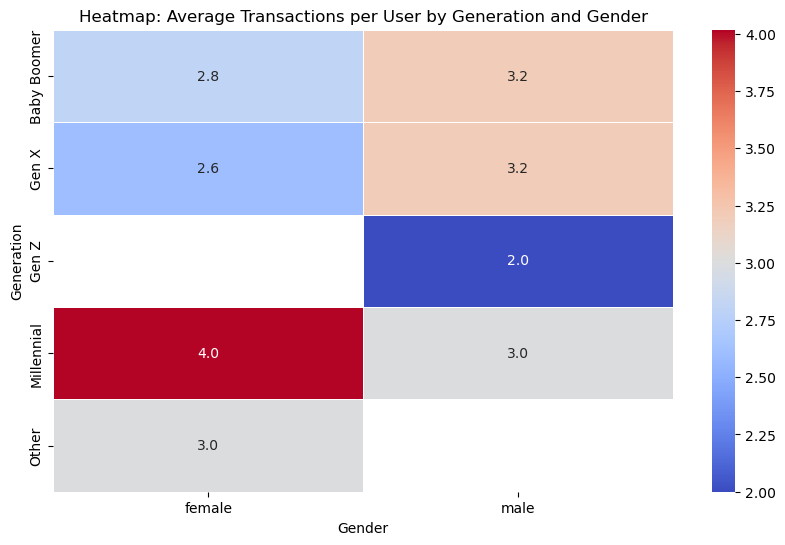

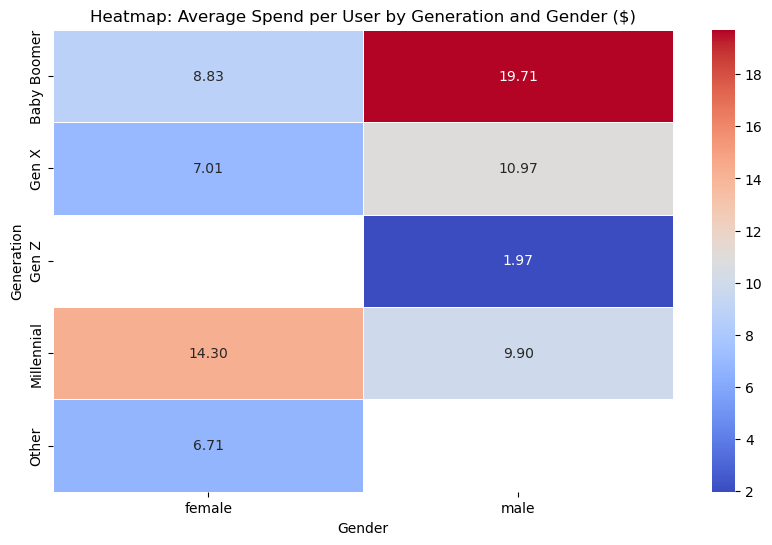

In [72]:
# Pivot the data for heatmap visualization (Average Transactions per User)
heatmap_data = df_power_users_by_age_gender_gen.pivot_table(
    index="Generation", 
    columns="GENDER", 
    values="avg_transactions_per_user", 
    aggfunc="mean"
)

# Heatmap for Average Transactions per User
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Transactions per User by Generation and Gender")
plt.xlabel("Gender")
plt.ylabel("Generation")
plt.show()

# Pivot the data for heatmap visualization (Average Spend per User)
heatmap_data_spend = df_power_users_by_age_gender_gen.pivot_table(
    index="Generation", 
    columns="GENDER", 
    values="avg_spent_per_user", 
    aggfunc="mean"
)

# Heatmap for Average Spend per User
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_spend, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Average Spend per User by Generation and Gender ($)")
plt.xlabel("Gender")
plt.ylabel("Generation")
plt.show()


In [73]:
query = """
WITH User_Generation AS (
    SELECT 
        ID AS USER_ID, 
        BIRTH_DATE,
        (strftime('%Y', 'now') - strftime('%Y', BIRTH_DATE)) AS AGE,
        CASE 
            WHEN BIRTH_DATE BETWEEN '1946-01-01' AND '1964-12-31' THEN 'Baby Boomer'
            WHEN BIRTH_DATE BETWEEN '1965-01-01' AND '1980-12-31' THEN 'Gen X'
            WHEN BIRTH_DATE BETWEEN '1981-01-01' AND '1996-12-31' THEN 'Millennial'
            WHEN BIRTH_DATE BETWEEN '1997-01-01' AND '2012-12-31' THEN 'Gen Z'
            ELSE 'Other'
        END AS Generation
    FROM Users
)
SELECT 
    g.Generation, 
    u.GENDER, 
    p.CATEGORY_1 AS Product_Category,
    COUNT(us.USER_ID) AS num_users,
    COUNT(us.total_transactions) AS total_transactions_per_user, 
    AVG(us.total_transactions) AS avg_transactions_per_user, 
    AVG(us.total_spent) AS avg_spent_per_user,
    MAX(us.total_transactions) AS max_transactions_by_user, 
    MAX(us.total_spent) AS max_spent_by_user
FROM Transactions t
JOIN User_Generation g ON t.USER_ID = g.USER_ID
JOIN Users u ON t.USER_ID = u.ID
JOIN Products p ON t.BARCODE = p.BARCODE
JOIN (
    SELECT USER_ID, COUNT(RECEIPT_ID) AS total_transactions, SUM(FINAL_SALE) AS total_spent
    FROM Transactions
    GROUP BY USER_ID
) us ON t.USER_ID = us.USER_ID
GROUP BY g.Generation, g.AGE, u.GENDER, p.CATEGORY_1
ORDER BY avg_transactions_per_user DESC, avg_spent_per_user DESC;
"""

# Execute the query and store results in a DataFrame
df_power_users_with_category = pd.read_sql_query(query, conn)
df_power_users_with_category

,Generation,GENDER,Product_Category,num_users,total_transactions_per_user,avg_transactions_per_user,avg_spent_per_user,max_transactions_by_user,max_spent_by_user
0,Baby Boomer,female,Snacks,4,4,6.0,52.28,6,52.28
1,Gen X,female,Snacks,4,4,6.0,20.28,6,20.28
2,Gen X,male,Alcohol,56,56,6.0,17.65,6,17.65
3,Gen X,male,Apparel & Accessories,12,12,6.0,17.65,6,17.65
4,Gen X,male,Beverages,24,24,6.0,17.65,6,17.65
...,...,...,...,...,...,...,...,...,...
136,Gen X,female,Health & Wellness,4,4,2.0,2.22,2,2.50
137,Baby Boomer,female,Health & Wellness,2,2,2.0,1.97,2,1.97
138,Gen Z,male,Snacks,2,2,2.0,1.97,2,1.97
139,Gen X,female,Beverages,2,2,2.0,1.52,2,1.52


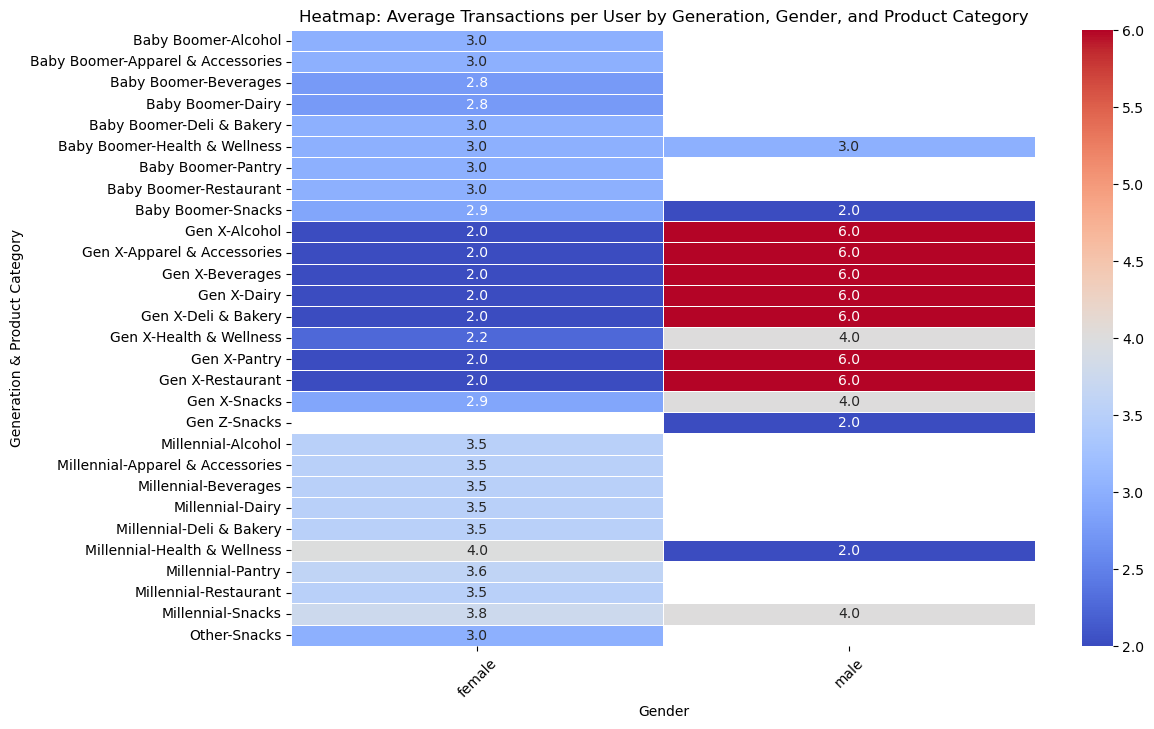

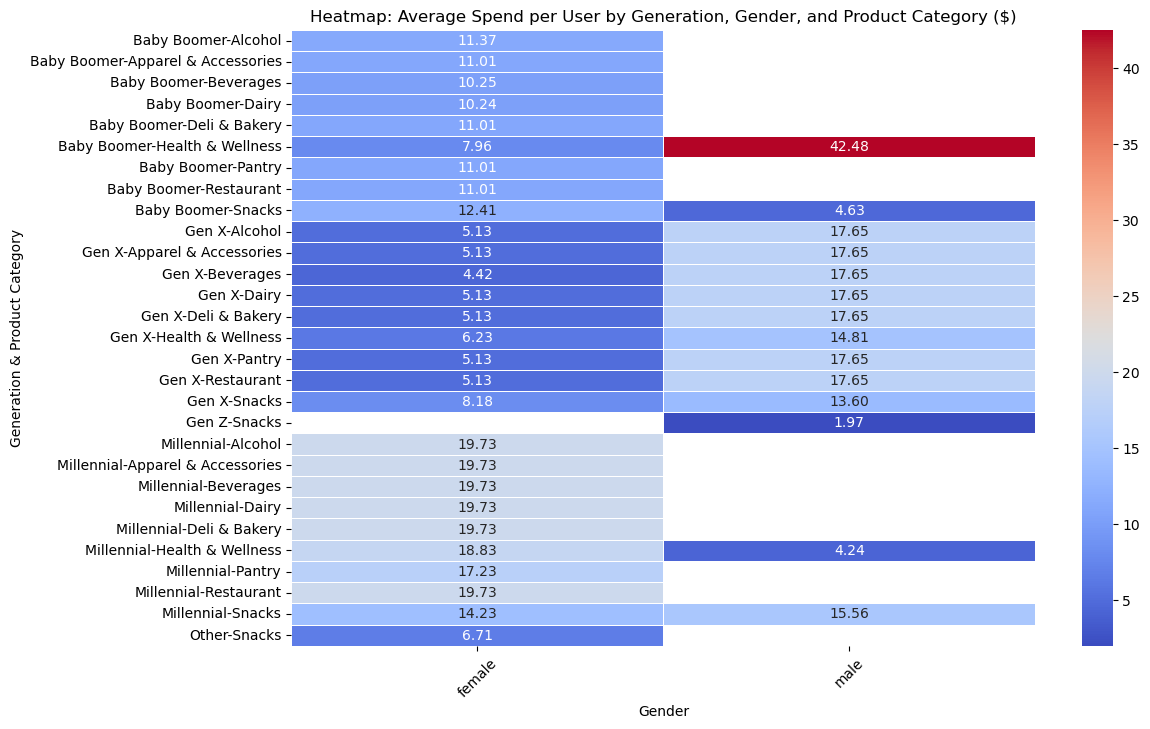

In [74]:
# Creating pivot table for heatmap visualization (Average Transactions per User by Generation, Gender, and Product Category)
heatmap_data_transactions = df_power_users_with_category.pivot_table(
    index=["Generation", "Product_Category"], 
    columns="GENDER", 
    values="avg_transactions_per_user", 
    aggfunc="mean"
)

# Heatmap for Average Transactions per User
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_transactions, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Transactions per User by Generation, Gender, and Product Category")
plt.xlabel("Gender")
plt.ylabel("Generation & Product Category")
plt.xticks(rotation=45)
plt.show()

# Creating pivot table for heatmap visualization (Average Spend per User by Generation, Gender, and Product Category)
heatmap_data_spend = df_power_users_with_category.pivot_table(
    index=["Generation", "Product_Category"], 
    columns="GENDER", 
    values="avg_spent_per_user", 
    aggfunc="mean"
)

# Heatmap for Average Spend per User
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_spend, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Average Spend per User by Generation, Gender, and Product Category ($)")
plt.xlabel("Gender")
plt.ylabel("Generation & Product Category")
plt.xticks(rotation=45)
plt.show()


In [75]:
#closing the connection. Please ensure to rerun the "Creating SQLite Temporary In Memory Database (file-based relational database)" to run queries
conn.close()

## End of Submission ##